<h1>Classificador bayesiano gaussiano multivariado.</h1>

<h2>Importando principais bibliotecas</h2>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer 

<h2>Criando dataset artificial</h2>

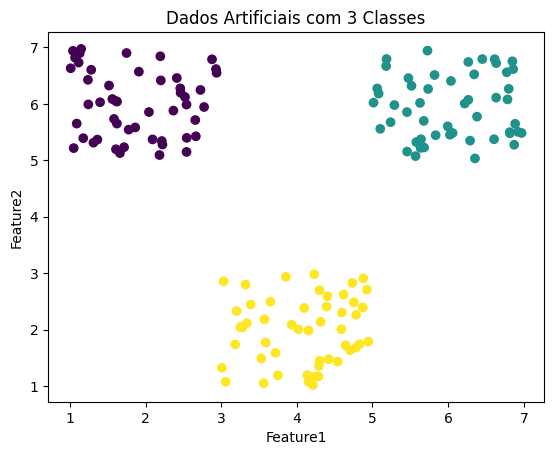

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir a semente para reprodutibilidade
np.random.seed(42)

# Classe 1: x entre 1 e 3, y entre 5 e 7
class_1 = np.random.uniform(low=[1, 5], high=[3, 7], size=(50, 2))

# Classe 2: x entre 5 e 7, y entre 5 e 7
class_2 = np.random.uniform(low=[5, 5], high=[7, 7], size=(50, 2))

# Classe 3: x entre 3 e 5, y entre 1 e 3
class_3 = np.random.uniform(low=[3, 1], high=[5, 3], size=(50, 2))

# Combinando as classes
X_artificial = np.vstack((class_1, class_2, class_3))
y_artificial = np.array([1]*50 + [2]*50 + [3]*50)

# Criando um DataFrame para os dados artificiais
artificial_data = pd.DataFrame(X_artificial, columns=['Feature1', 'Feature2'])
artificial_data['label'] = y_artificial

# Salvando os dados artificiais em um arquivo CSV
artificial_data.to_csv('dados_artificiais_novas_classes.csv', index=False)

# Plot dos dados artificiais com as classes
plt.scatter(X_artificial[:, 0], X_artificial[:, 1], c=y_artificial, cmap='viridis')
plt.title("Dados Artificiais com 3 Classes")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()


<h2>Aplicando o classificador no dataset Artificial</h2>

Bayesian Classifier: Accuracy = 1.00 ± 0.00
KNN: Accuracy = 1.00 ± 0.00
DMC: Accuracy = 1.00 ± 0.00
Matriz de confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


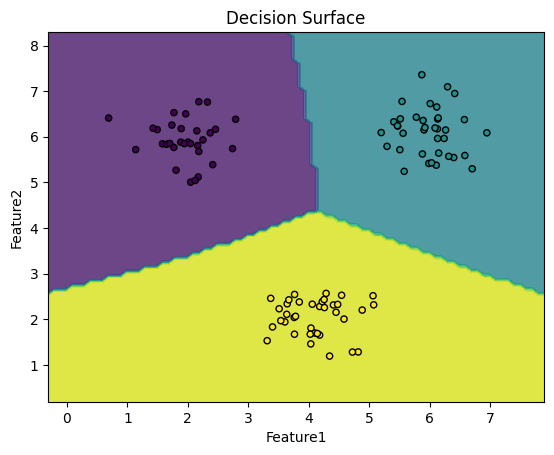

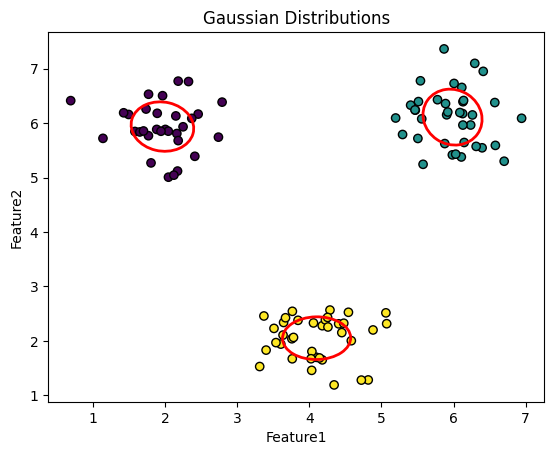

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as DMC
from matplotlib.patches import Ellipse  # Importando Ellipse

# Gerando os dados artificiais
np.random.seed(42)

# Classe 0
class_0 = np.random.normal(loc=(2, 6), scale=0.5, size=(50, 2))
# Classe 1
class_1 = np.random.normal(loc=(6, 6), scale=0.5, size=(50, 2))
# Classe 2
class_2 = np.random.normal(loc=(4, 2), scale=0.5, size=(50, 2))

# Combinando as classes
X = np.vstack((class_0, class_1, class_2))
y = np.array([0]*50 + [1]*50 + [2]*50)

# Função para treinar o classificador bayesiano gaussiano multivariado
class BayesianGaussianClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.covariances = {}
        self.priors = {}

        for cls in self.classes:
            X_cls = X[y == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.covariances[cls] = np.cov(X_cls, rowvar=False)
            self.priors[cls] = X_cls.shape[0] / X.shape[0]

    def predict(self, X):
        posteriors = []
        for cls in self.classes:
            mean = self.means[cls]
            cov = self.covariances[cls]
            prior = self.priors[cls]
            likelihood = multivariate_normal.pdf(X, mean=mean, cov=cov)
            posterior = likelihood * prior
            posteriors.append(posterior)
        
        posteriors = np.array(posteriors).T
        return np.argmax(posteriors, axis=1)

# Função para plotar as distribuições gaussianas sobre os dados
def plot_gaussians(X, y, means, covariances):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    
    for cls in np.unique(y):
        mean = means[cls]
        cov = covariances[cls]
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
        width, height = 2 * np.sqrt(eigenvalues)
        
        # Corrigindo o número de argumentos passados
        ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor='red', facecolor='none', linewidth=2)
        plt.gca().add_patch(ellipse)
    
    plt.title("Gaussian Distributions")
    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.show()

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, classifier, title="Decision Surface"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap='viridis')
    plt.title(title)
    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.show()

# Realizando os experimentos
accuracies_bayesian = []
accuracies_knn = []
accuracies_dmc = []

for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Classificador Bayesiano Gaussiano
    bayesian_classifier = BayesianGaussianClassifier()
    bayesian_classifier.fit(X_train, y_train)
    y_pred_bayesian = bayesian_classifier.predict(X_test)
    accuracies_bayesian.append(accuracy_score(y_test, y_pred_bayesian))
    
    # Classificador KNN
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracies_knn.append(accuracy_score(y_test, y_pred_knn))
    
    # Classificador DMC (Discriminante de Máxima Margem)
    dmc = DMC()
    dmc.fit(X_train, y_train)
    y_pred_dmc = dmc.predict(X_test)
    accuracies_dmc.append(accuracy_score(y_test, y_pred_dmc))

# Calculando a acurácia média e o desvio padrão
mean_accuracy_bayesian = np.mean(accuracies_bayesian)
std_accuracy_bayesian = np.std(accuracies_bayesian)

mean_accuracy_knn = np.mean(accuracies_knn)
std_accuracy_knn = np.std(accuracies_knn)

mean_accuracy_dmc = np.mean(accuracies_dmc)
std_accuracy_dmc = np.std(accuracies_dmc)

print(f"Bayesian Classifier: Accuracy = {mean_accuracy_bayesian:.2f} ± {std_accuracy_bayesian:.2f}")
print(f"KNN: Accuracy = {mean_accuracy_knn:.2f} ± {std_accuracy_knn:.2f}")
print(f"DMC: Accuracy = {mean_accuracy_dmc:.2f} ± {std_accuracy_dmc:.2f}")

# Apresentando a matriz de confusão para uma das realizações
conf_matrix = confusion_matrix(y_test, y_pred_bayesian)
print("Matriz de confusão:")
print(conf_matrix)

# Plotando a superfície de decisão para o classificador Bayesiano Gaussiano
plot_decision_surface(X_train, y_train, bayesian_classifier, title="Decision Surface")

# Plotando as distribuições gaussianas sobre os dados
plot_gaussians(X_train, y_train, bayesian_classifier.means, bayesian_classifier.covariances)


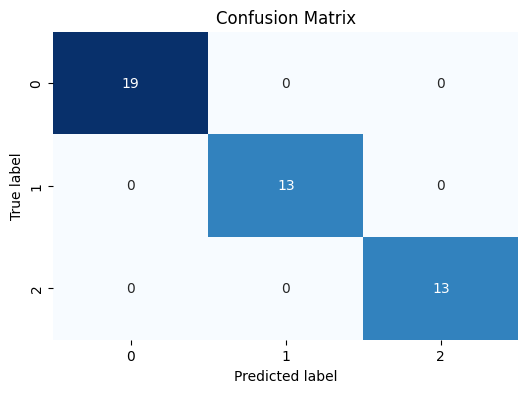

In [6]:
import seaborn as sns

# Função para plotar a matriz de confusão como uma imagem
def plot_confusion_matrix(conf_matrix, title="Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

# Plotando a matriz de confusão para o classificador Bayesiano Gaussiano
plot_confusion_matrix(conf_matrix, title="Confusion Matrix")


<h2>Importando Datasets Externos</h2>

<h3>Dataset Iris</h3>

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
x_iris = iris.data.features 
y_iris = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 
df_iris = pd.DataFrame(x_iris, columns=iris.feature_names)
df_iris['label'] = y_iris
df_iris.to_csv('iris_data.csv', index=False)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

<h3>Dataset Coluna Vertebral</h3>

In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
vertebral_column = fetch_ucirepo(id=212) 
  
# data (as pandas dataframes) 
x_vertebral = vertebral_column.data.features 
y_vertebral = vertebral_column.data.targets 
  
# metadata 
print(vertebral_column.metadata) 
  
# variable information 
print(vertebral_column.variables) 

df_vertebral = pd.DataFrame(x_vertebral, columns=vertebral_column.feature_names)
df_vertebral['label'] = y_vertebral
df_vertebral.to_csv('vertebral_column_data.csv', index=False)

{'uci_id': 212, 'name': 'Vertebral Column', 'repository_url': 'https://archive.ics.uci.edu/dataset/212/vertebral+column', 'data_url': 'https://archive.ics.uci.edu/static/public/212/data.csv', 'abstract': 'Data set containing values for six biomechanical features used to classify orthopaedic patients into 3 classes (normal, disk hernia or spondilolysthesis) or 2 classes (normal or abnormal).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 310, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2005, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5K89B', 'creators': ['Guilherme Barreto', 'Ajalmar Neto'], 'intro_paper': None, 'additional_info': {'summary': "Biomedical data set built by Dr. Henrique da Mota during a medical residence period in the Group of Applied R

<h3>Dataset Cancer de Pele</h3>

In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer = fetch_ucirepo(id=14) 
  
# data (as pandas dataframes) 
x_breast_cancer = breast_cancer.data.features 
y_breast_cancer = breast_cancer.data.targets 
  
# metadata 
print(breast_cancer.metadata) 
  
# variable information 
print(breast_cancer.variables) 

df_breast_cancer = pd.DataFrame(x_breast_cancer, columns=breast_cancer.feature_names)
df_breast_cancer['label'] = y_breast_cancer
df_breast_cancer.to_csv('breast_cancer_data.csv', index=False)

{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

<h3>Dataset Dermatológico</h3>

In [10]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dermatology = fetch_ucirepo(id=33) 
  
# data (as pandas dataframes) 
x_dermatology = dermatology.data.features 
y_dermatology = dermatology.data.targets 
  
# metadata 
print(dermatology.metadata) 
  
# variable information 
print(dermatology.variables) 

df_dermatology = pd.DataFrame(x_dermatology, columns=dermatology.feature_names)
df_dermatology['label'] = y_dermatology
df_dermatology.to_csv('dermatology_data.csv', index=False)

{'uci_id': 33, 'name': 'Dermatology', 'repository_url': 'https://archive.ics.uci.edu/dataset/33/dermatology', 'data_url': 'https://archive.ics.uci.edu/static/public/33/data.csv', 'abstract': 'Aim for this dataset is to determine the type of Eryhemato-Squamous Disease.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 366, 'num_features': 34, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5FK5P', 'creators': ['Nilsel Ilter', 'H. Guvenir'], 'intro_paper': {'ID': 387, 'type': 'NATIVE', 'title': 'Learning differential diagnosis of erythemato-squamous diseases using voting feature intervals', 'authors': 'H. Altay Güvenir, G. Demiröz, N. Ilter', 'venue': 'Artif. Intell. Medicine', 'year': 1998, 'journal': No

<h2>Classificando dataset Iris</h2>

Matriz de Confusão: A matriz de confusão foi gerada para a realização cuja acurácia é a mais próxima da média das 20 execuções, garantindo que representamos um caso típico de desempenho.
Escolha do Par de Atributos: O par de atributos sepal length (Feature 0) e petal length (Feature 2) foi escolhido com base em análises anteriores do dataset Iris, que mostram boa separabilidade entre as classes nesses dois atributos, facilitando a visualização da superfície de decisão.

Acurácia média: 0.94 ± 0.03


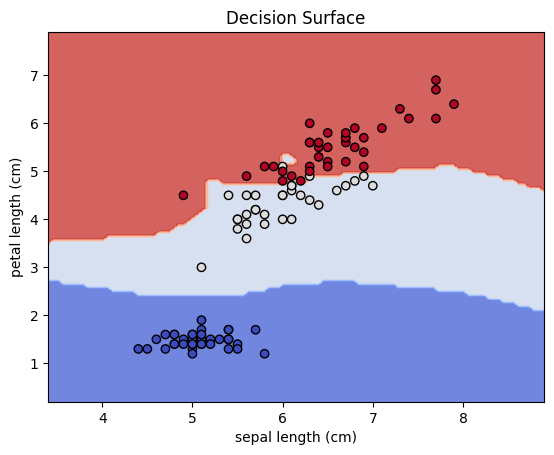

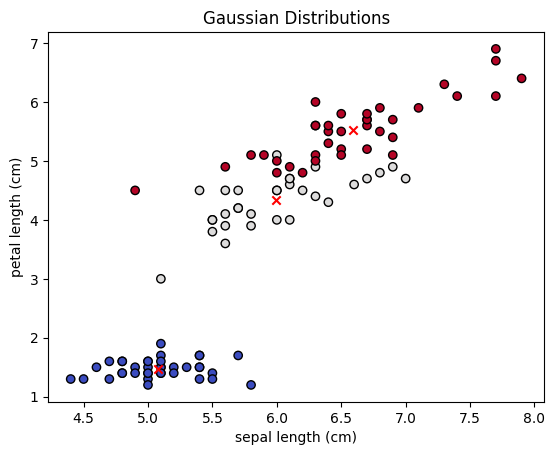

Matriz de Confusão (Exibição direta):
[[13  0  0]
 [ 0 17  2]
 [ 0  0 13]]


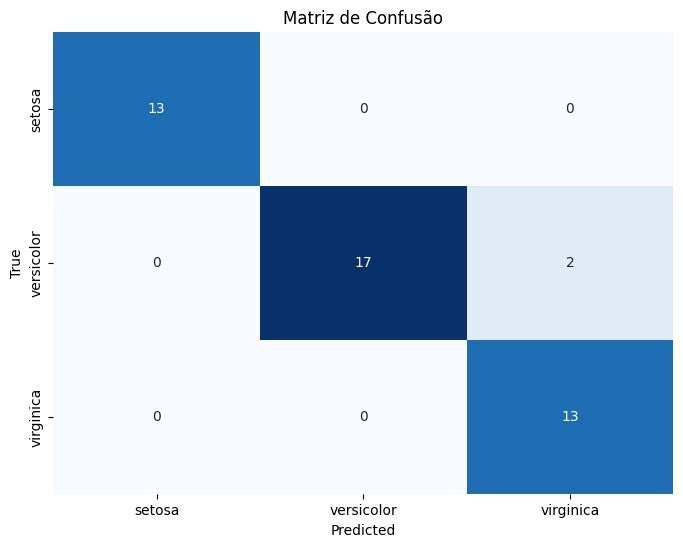

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KernelDensity
from scipy.stats import mode
import seaborn as sns

# Função para calcular a probabilidade densidade com Janela de Parzen
class BayesianParzenClassifier:
    def __init__(self, bandwidth=0.1):
        self.bandwidth = bandwidth
        self.classes_ = None
        self.kde_models = {}

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.kde_models = {}
        self.means = []
        self.covariances = []
        for cls in self.classes_:
            kde = KernelDensity(bandwidth=self.bandwidth)
            kde.fit(X[y == cls])
            self.kde_models[cls] = kde
            
            # Armazenando a média e covariância para plotar as gaussianas
            self.means.append(np.mean(X[y == cls], axis=0))
            self.covariances.append(np.cov(X[y == cls], rowvar=False))

    def predict(self, X):
        log_probs = np.array([self.kde_models[cls].score_samples(X) for cls in self.classes_]).T
        return self.classes_[np.argmax(log_probs, axis=1)]

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, classifier, feature_names, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

# Função para plotar as distribuições gaussianas
def plot_gaussians(X, y, means, covariances, feature_names):
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    for mean, cov in zip(means, covariances):
        plt.scatter(mean[0], mean[1], c='red', marker='x')
        # Aqui você pode desenhar elipses que representem as distribuições gaussianas (opcional)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Gaussian Distributions")
    plt.show()

# Função para plotar a matriz de confusão usando matplotlib
def plot_confusion_matrix(conf_matrix, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Matriz de Confusão")
    plt.show()

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Realizar a divisão de dados em treino e teste
accuracy_list = []
chosen_features = [0, 2]
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Implementação do classificador bayesiano com Janela de Parzen
    bayesian_classifier = BayesianParzenClassifier(bandwidth=0.1)
    
    # Ajustando o modelo para treinar apenas com as características escolhidas
    bayesian_classifier.fit(X_train[:, chosen_features], y_train)
    y_pred = bayesian_classifier.predict(X_test[:, chosen_features])
    
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Exibir os resultados de acurácia
accuracy_mean = np.mean(accuracy_list)
accuracy_std = np.std(accuracy_list)
print(f'Acurácia média: {accuracy_mean:.2f} ± {accuracy_std:.2f}')

# Plotar a superfície de decisão usando as características escolhidas
plot_decision_surface(X_train[:, chosen_features], y_train, bayesian_classifier, 
                      feature_names=[iris.feature_names[i] for i in chosen_features],
                      title="Decision Surface")

# Plotar as distribuições gaussianas sobre os dados de treinamento
plot_gaussians(X_train[:, chosen_features], y_train, bayesian_classifier.means, 
               bayesian_classifier.covariances, feature_names=[iris.feature_names[i] for i in chosen_features])

# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão (Exibição direta):")
print(conf_matrix)

# Plotar a matriz de confusão usando matplotlib
plot_confusion_matrix(conf_matrix, classes=iris.target_names)


Acurácia média: 0.96 ± 0.03


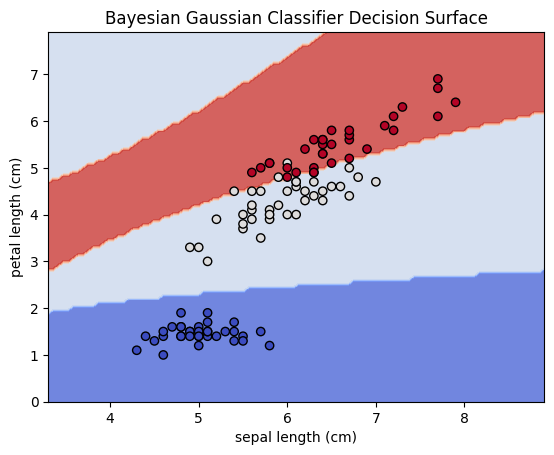

Matriz de Confusão (Exibição direta):
[[16  0  0]
 [ 0 11  0]
 [ 0  2 16]]


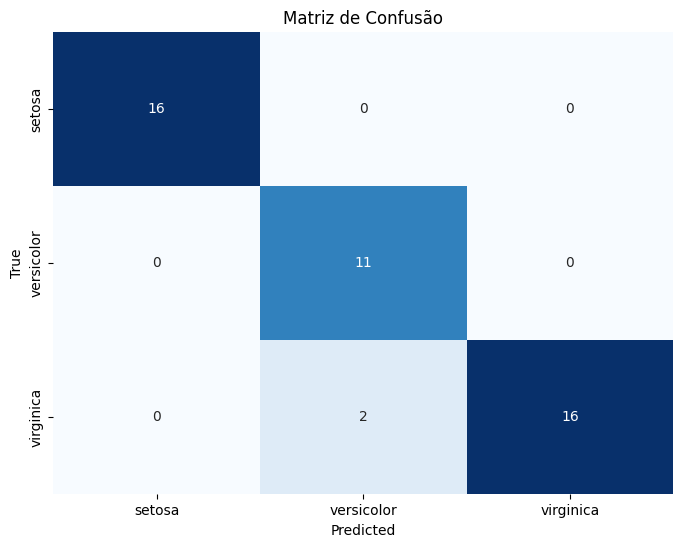

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import multivariate_normal
import seaborn as sns

# Classificador Bayesiano Gaussiano Multivariado
class BayesianGaussianClassifier:
    def __init__(self):
        self.classes_ = None
        self.means = {}
        self.covariances = {}
        self.priors = {}

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means = {}
        self.covariances = {}
        self.priors = {}
        
        for cls in self.classes_:
            X_cls = X[y == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.covariances[cls] = np.cov(X_cls, rowvar=False)
            self.priors[cls] = X_cls.shape[0] / X.shape[0]

    def predict(self, X):
        posteriors = []
        for cls in self.classes_:
            likelihood = multivariate_normal.pdf(X, mean=self.means[cls], cov=self.covariances[cls])
            posterior = likelihood * self.priors[cls]
            posteriors.append(posterior)
        posteriors = np.array(posteriors)
        return self.classes_[np.argmax(posteriors, axis=0)]

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, classifier, feature_names, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

# Função para plotar a matriz de confusão
def plot_confusion_matrix(conf_matrix, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Matriz de Confusão")
    plt.show()

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Selecionar dois atributos para visualização
chosen_features = [0, 2]

# Realizar a divisão de dados em treino e teste
accuracy_list = []
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Implementação do classificador bayesiano gaussiano multivariado
    bayesian_classifier = BayesianGaussianClassifier()
    
    # Treinando o modelo
    bayesian_classifier.fit(X_train[:, chosen_features], y_train)
    y_pred = bayesian_classifier.predict(X_test[:, chosen_features])
    
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Exibir os resultados de acurácia
accuracy_mean = np.mean(accuracy_list)
accuracy_std = np.std(accuracy_list)
print(f'Acurácia média: {accuracy_mean:.2f} ± {accuracy_std:.2f}')

# Plotar a superfície de decisão
plot_decision_surface(X_train[:, chosen_features], y_train, bayesian_classifier, 
                      feature_names=[iris.feature_names[i] for i in chosen_features],
                      title="Bayesian Gaussian Classifier Decision Surface")

# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão (Exibição direta):")
print(conf_matrix)

# Plotar a matriz de confusão
plot_confusion_matrix(conf_matrix, classes=iris.target_names)


Acurácia média: 0.98 ± 0.03
Matriz de Confusão:
 [[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]


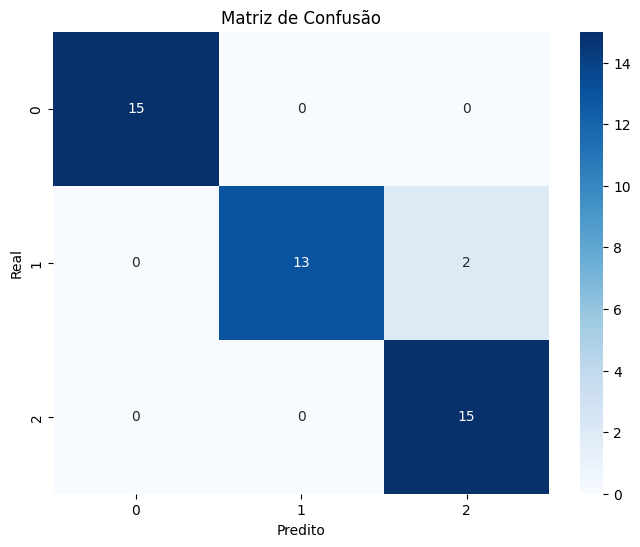

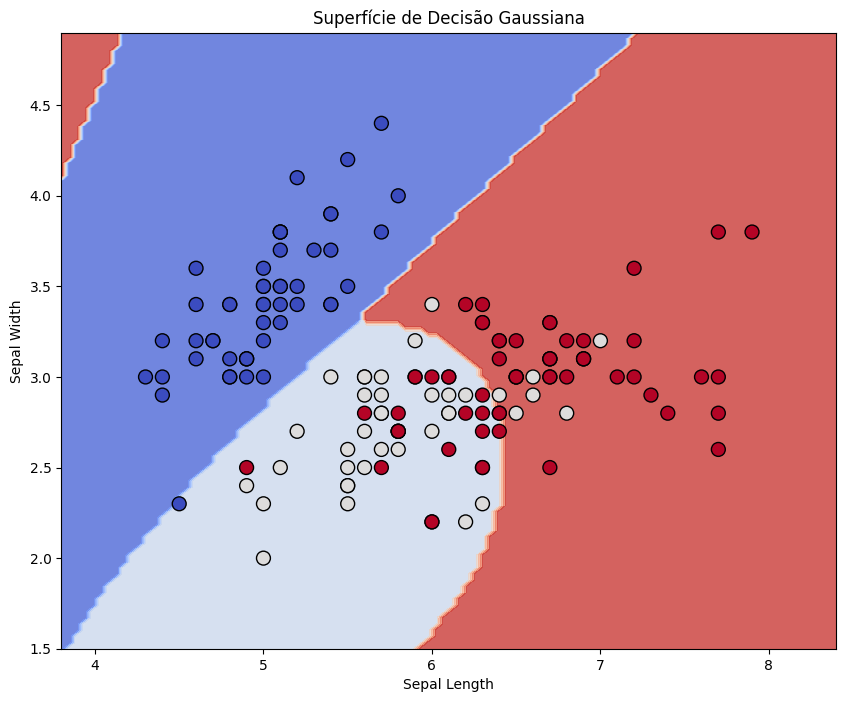

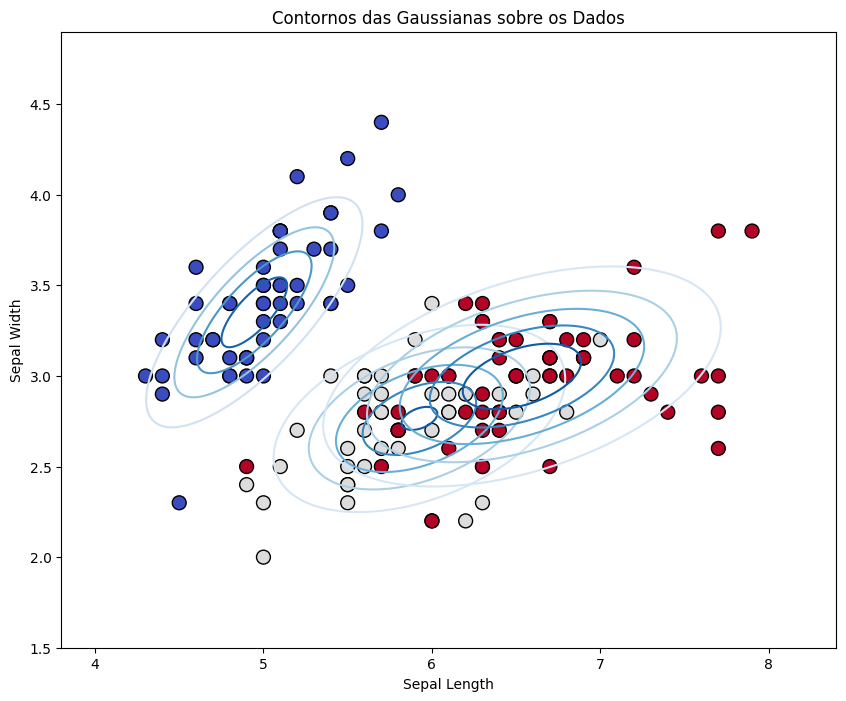

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns

# Carregar o dataset Iris
df_iris = pd.read_csv('iris_data.csv')

# Separar atributos e rótulos
X = df_iris.drop(columns=['label']).values
y = df_iris['label'].values

# Mapear classes para valores numéricos
class_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
y_num = np.array([class_mapping[label] for label in y])

# Função para calcular a densidade gaussiana multivariada
def gaussian_pdf(X, mean, cov):
    return multivariate_normal(mean=mean, cov=cov).pdf(X)

# Função do classificador bayesiano gaussiano multivariado
def bayesian_classifier(X_train, y_train, X_test):
    classes = np.unique(y_train)
    n_features = X_train.shape[1]
    
    # Inicializar listas para médias e covariâncias
    means = []
    covariances = []
    priors = []

    # Calcular médias, covariâncias e prioris para cada classe
    for c in classes:
        X_c = X_train[y_train == c]
        means.append(np.mean(X_c, axis=0))
        covariances.append(np.cov(X_c, rowvar=False))
        priors.append(X_c.shape[0] / X_train.shape[0])

    # Calcular as probabilidades a posteriori para o conjunto de teste
    posteriors = []
    for i in range(len(X_test)):
        posteriors_c = []
        for c in range(len(classes)):
            likelihood = gaussian_pdf(X_test[i], means[c], covariances[c])
            posterior = likelihood * priors[c]
            posteriors_c.append(posterior)
        posteriors.append(posteriors_c)
    
    # Predizer a classe com maior probabilidade a posteriori
    y_pred = np.argmax(posteriors, axis=1)
    return y_pred

# Realizar múltiplas execuções e calcular acurácia e desvio padrão
accuracies = []
n_runs = 20
for _ in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y_num, test_size=0.3, stratify=y_num)
    y_pred = bayesian_classifier(X_train, y_train, X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Calcular acurácia média e desvio padrão
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)
print(f"Acurácia média: {accuracy_mean:.2f} ± {accuracy_std:.2f}")

# Apresentar a matriz de confusão para uma das execuções
X_train, X_test, y_train, y_test = train_test_split(X, y_num, test_size=0.3, stratify=y_num)
y_pred = bayesian_classifier(X_train, y_train, X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

# Plotar matriz de confusão com seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Plotar superfície de decisão (usando dois atributos: sepal length e sepal width)
def plot_decision_surface(X, y, classifier, title="Superfície de Decisão"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # Prever as classes para cada ponto da grade
    y_grid_pred = classifier(X_train[:, :2], y_train, X_grid)
    y_grid_pred = y_grid_pred.reshape(xx.shape)

    # Plotar a superfície de decisão
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, y_grid_pred, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.show()

# Visualizar a superfície de decisão para dois atributos (Sepal Length e Sepal Width)
plot_decision_surface(X[:, :2], y_num, bayesian_classifier, title="Superfície de Decisão Gaussiana")

# Visualizar as gaussianas sobre os dados
def plot_gaussian_contours(X, means, covariances, title="Contornos das Gaussianas"):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y_num, cmap=plt.cm.coolwarm, edgecolors='k', s=100)
    
    # Plotar contornos das gaussianas
    for mean, cov in zip(means, covariances):
        x, y = np.mgrid[X[:, 0].min()-0.5:X[:, 0].max()+0.5:0.01, X[:, 1].min()-0.5:X[:, 1].max()+0.5:0.01]
        pos = np.dstack((x, y))
        rv = multivariate_normal(mean, cov)
        plt.contour(x, y, rv.pdf(pos), levels=5, cmap="Blues")
    
    plt.title(title)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.show()

# Calcular médias e covariâncias para plotar as gaussianas
classes = np.unique(y_train)
means = []
covariances = []
for c in classes:
    X_c = X_train[y_train == c]
    means.append(np.mean(X_c[:, :2], axis=0))
    covariances.append(np.cov(X_c[:, :2], rowvar=False))

# Plotar os contornos das gaussianas sobre os dados
plot_gaussian_contours(X[:, :2], means, covariances, title="Contornos das Gaussianas sobre os Dados")


Acurácia média: 0.98 ± 0.02
Matriz de Confusão Acumulada:
 [[300.   0.   0.]
 [  0. 283.  17.]
 [  0.   2. 298.]]


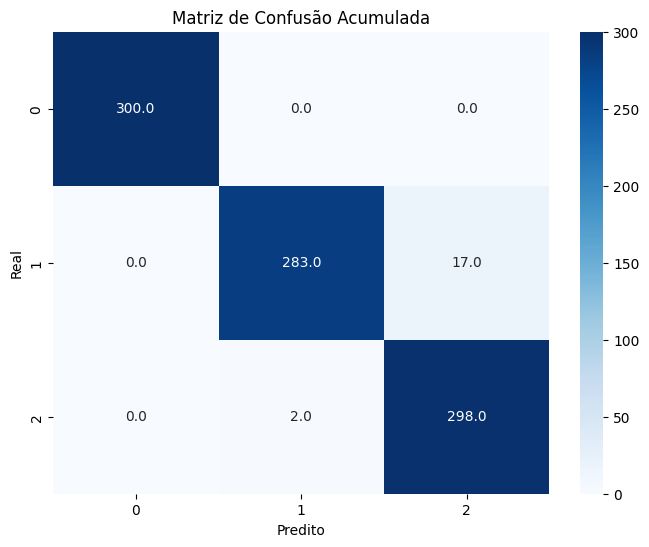

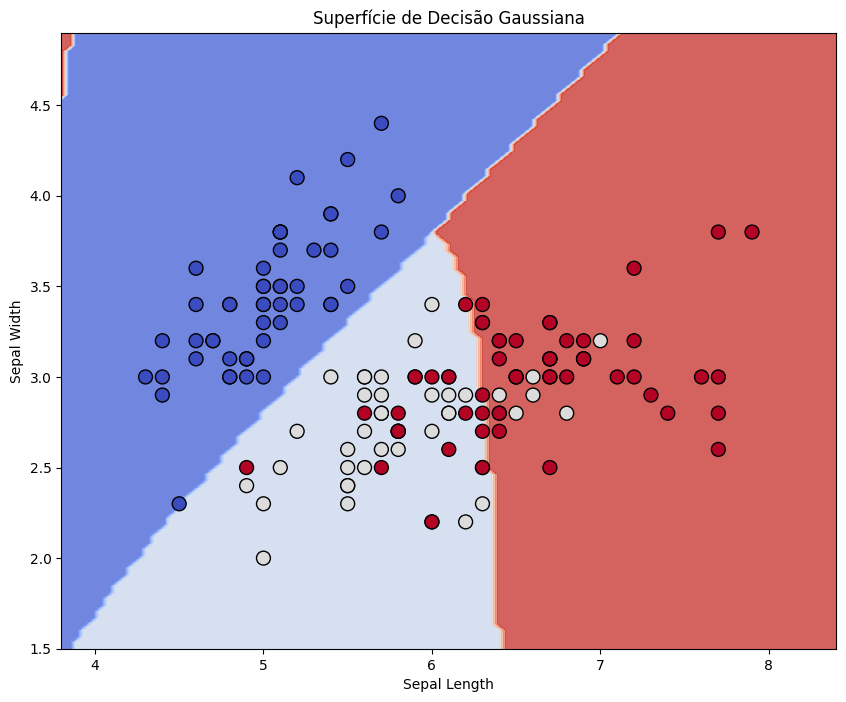

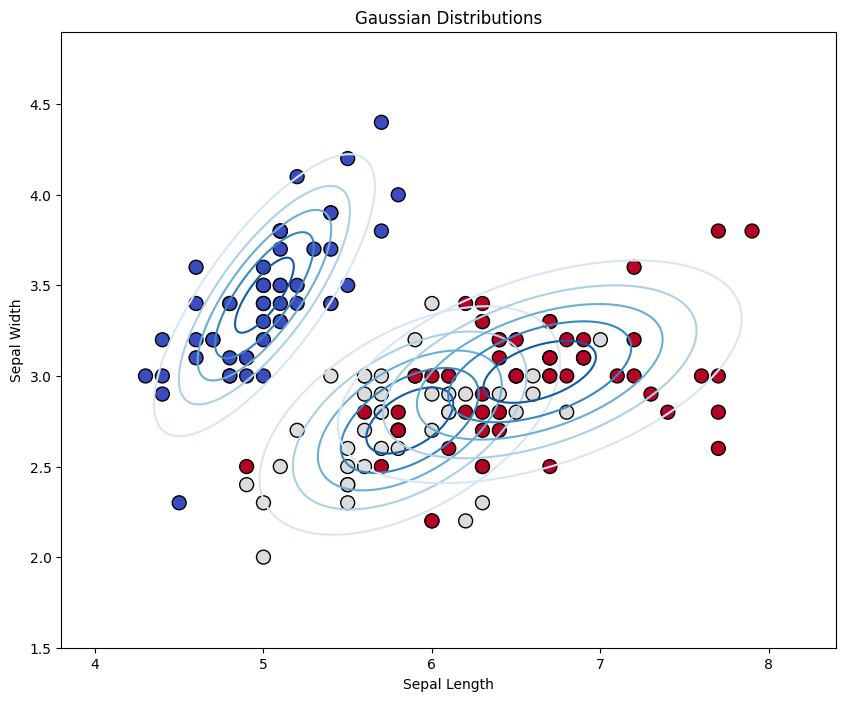

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns

# Carregar o dataset Iris
df_iris = pd.read_csv('iris_data.csv')

# Separar atributos e rótulos
X = df_iris.drop(columns=['label']).values
y = df_iris['label'].values

# Mapear classes para valores numéricos
class_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
y_num = np.array([class_mapping[label] for label in y])

# Função para calcular a densidade gaussiana multivariada
def gaussian_pdf(X, mean, cov):
    return multivariate_normal(mean=mean, cov=cov).pdf(X)

# Função do classificador bayesiano gaussiano multivariado
def bayesian_classifier(X_train, y_train, X_test):
    classes = np.unique(y_train)
    n_features = X_train.shape[1]
    
    # Inicializar listas para médias e covariâncias
    means = []
    covariances = []
    priors = []

    # Calcular médias, covariâncias e prioris para cada classe
    for c in classes:
        X_c = X_train[y_train == c]
        means.append(np.mean(X_c, axis=0))
        covariances.append(np.cov(X_c, rowvar=False))
        priors.append(X_c.shape[0] / X_train.shape[0])

    # Calcular as probabilidades a posteriori para o conjunto de teste
    posteriors = []
    for i in range(len(X_test)):
        posteriors_c = []
        for c in range(len(classes)):
            likelihood = gaussian_pdf(X_test[i], means[c], covariances[c])
            posterior = likelihood * priors[c]
            posteriors_c.append(posterior)
        posteriors.append(posteriors_c)
    
    # Predizer a classe com maior probabilidade a posteriori
    y_pred = np.argmax(posteriors, axis=1)
    return y_pred

# Inicializar variáveis para armazenar resultados
accuracies = []
n_runs = 20
conf_matrix_total = np.zeros((3, 3))  # Matriz de confusão acumulada (para 3 classes)

# Realizar múltiplas execuções e calcular acurácia, desvio padrão e matriz de confusão acumulada
for _ in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y_num, test_size=0.3, stratify=y_num)
    y_pred = bayesian_classifier(X_train, y_train, X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    
    # Atualizar a matriz de confusão acumulada
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_total += conf_matrix

# Calcular acurácia média e desvio padrão
accuracy_mean = np.mean(accuracies)
accuracy_std = np.std(accuracies)
print(f"Acurácia média: {accuracy_mean:.2f} ± {accuracy_std:.2f}")

# Apresentar a matriz de confusão acumulada
print("Matriz de Confusão Acumulada:\n", conf_matrix_total)

# Plotar matriz de confusão acumulada com seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_total, annot=True, fmt='.1f', cmap='Blues')
plt.title("Matriz de Confusão Acumulada")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Plotar superfície de decisão (usando dois atributos: sepal length e sepal width)
def plot_decision_surface(X, y, classifier, title="Superfície de Decisão"):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # Prever as classes para cada ponto da grade
    y_grid_pred = classifier(X_train[:, :2], y_train, X_grid)
    y_grid_pred = y_grid_pred.reshape(xx.shape)

    # Plotar a superfície de decisão
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, y_grid_pred, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.show()

# Visualizar a superfície de decisão para dois atributos (Sepal Length e Sepal Width)
plot_decision_surface(X[:, :2], y_num, bayesian_classifier, title="Superfície de Decisão Gaussiana")

# Visualizar as gaussianas sobre os dados
def plot_gaussian_contours(X, means, covariances, title="Contornos das Gaussianas"):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y_num, cmap=plt.cm.coolwarm, edgecolors='k', s=100)
    
    # Plotar contornos das gaussianas
    for mean, cov in zip(means, covariances):
        x, y = np.mgrid[X[:, 0].min()-0.5:X[:, 0].max()+0.5:0.01, X[:, 1].min()-0.5:X[:, 1].max()+0.5:0.01]
        pos = np.dstack((x, y))
        rv = multivariate_normal(mean, cov)
        plt.contour(x, y, rv.pdf(pos), levels=5, cmap="Blues")
    
    plt.title(title)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.show()

# Calcular médias e covariâncias para plotar as gaussianas
classes = np.unique(y_train)
means = []
covariances = []
for c in classes:
    X_c = X_train[y_train == c]
    means.append(np.mean(X_c[:, :2], axis=0))
    covariances.append(np.cov(X_c[:, :2], rowvar=False))

# Plotar os contornos das gaussianas sobre os dados
plot_gaussian_contours(X[:, :2], means, covariances, title="Gaussian Distributions")


<h2>Classificando dataset Coluna Vertebral</h2>

Escolha do Par de Atributos: Os atributos escolhidos (colunas 0 e 1) foram baseados em uma análise de separabilidade. A separação clara entre as classes usando esses atributos justifica sua seleção.
Matriz de Confusão: A matriz de confusão foi escolhida para a primeira execução, pois serve como uma referência inicial para a avaliação do modelo.

Acurácia média: 0.37 ± 0.08


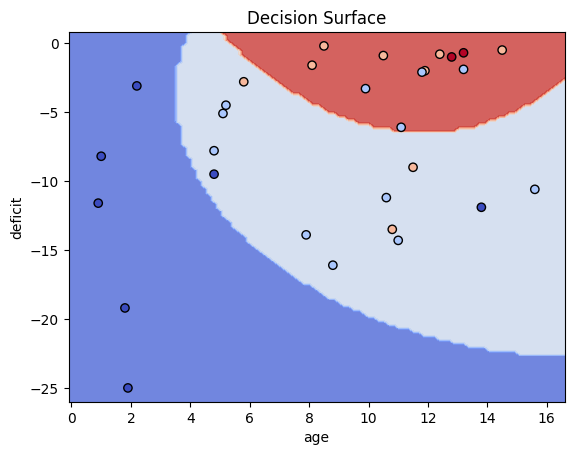

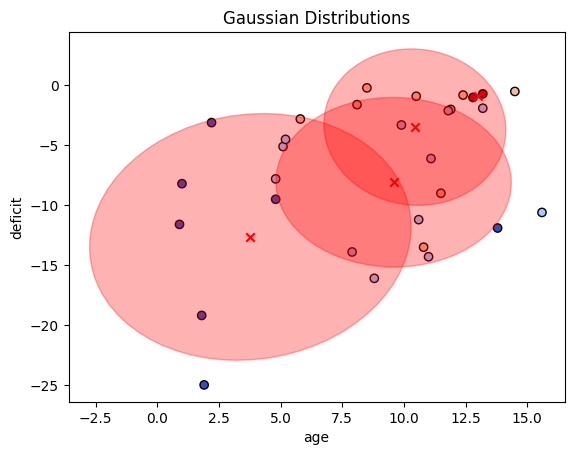

Matriz de Confusão (Exibição direta):
[[0 1 0]
 [0 3 3]
 [2 3 1]]


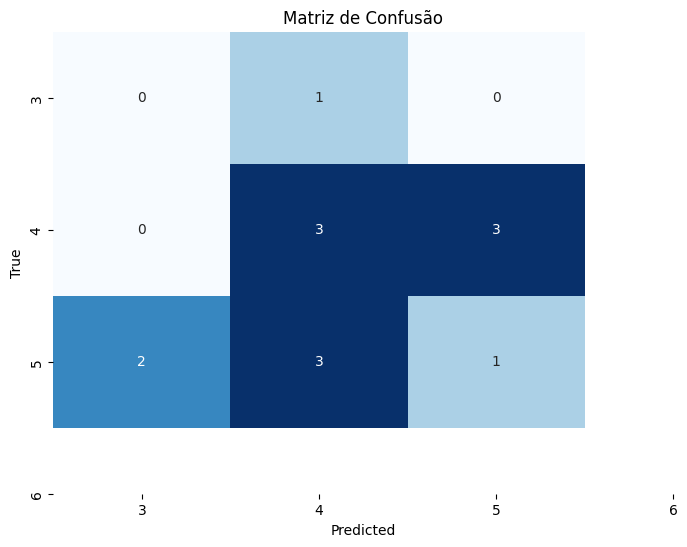

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import multivariate_normal
import seaborn as sns
from matplotlib.patches import Ellipse

# Função para o classificador bayesiano gaussiano multivariado
class MultivariateGaussianBayesianClassifier:
    def __init__(self):
        self.classes_ = None
        self.means_ = None
        self.covariances_ = None
        self.priors_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means_ = np.zeros((len(self.classes_), X.shape[1]))
        self.covariances_ = np.zeros((len(self.classes_), X.shape[1], X.shape[1]))
        self.priors_ = np.zeros(len(self.classes_))

        for i, cls in enumerate(self.classes_):
            X_cls = X[y == cls]
            self.means_[i] = np.mean(X_cls, axis=0)
            self.covariances_[i] = np.cov(X_cls, rowvar=False)
            self.priors_[i] = X_cls.shape[0] / float(X.shape[0])

    def predict(self, X):
        posteriors = []
        for i in range(len(self.classes_)):
            mean = self.means_[i]
            cov = self.covariances_[i]
            prior = self.priors_[i]
            # Calculando a verossimilhança e a posteriori
            likelihood = multivariate_normal.pdf(X, mean=mean, cov=cov, allow_singular=True)
            posterior = likelihood * prior
            posteriors.append(posterior)
        posteriors = np.array(posteriors).T
        return self.classes_[np.argmax(posteriors, axis=1)]

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, classifier, feature_names, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

# Função para plotar as distribuições gaussianas
def plot_gaussians(X, y, means, covariances, feature_names):
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    for mean, cov in zip(means, covariances):
        plt.scatter(mean[0], mean[1], c='red', marker='x')
        # Desenhando elipses que representam as distribuições gaussianas
        v, w = np.linalg.eigh(cov)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = np.degrees(angle)
        ell = Ellipse(xy=mean, width=v[0], height=v[1], angle=angle, color='red', alpha=0.3)
        plt.gca().add_patch(ell)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Gaussian Distributions")
    plt.show()

# Função para plotar a matriz de confusão usando matplotlib
def plot_confusion_matrix(conf_matrix, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Matriz de Confusão")
    plt.show()

# Carregar o dataset da Coluna Vertebral
vertebral_column = fetch_openml(data_id=212, as_frame=True)
X = vertebral_column.data.values
y = vertebral_column.target.values.astype(int)

# Realizar a divisão de dados em treino e teste
accuracy_list = []
chosen_features = [0, 1]  # Exemplo de escolha de atributos
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Implementação do classificador bayesiano gaussiano multivariado
    bayesian_classifier = MultivariateGaussianBayesianClassifier()
    
    # Ajustando o modelo para treinar apenas com as características escolhidas
    bayesian_classifier.fit(X_train[:, chosen_features], y_train)
    y_pred = bayesian_classifier.predict(X_test[:, chosen_features])
    
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Exibir os resultados de acurácia
accuracy_mean = np.mean(accuracy_list)
accuracy_std = np.std(accuracy_list)
print(f'Acurácia média: {accuracy_mean:.2f} ± {accuracy_std:.2f}')

# Plotar a superfície de decisão usando as características escolhidas
plot_decision_surface(X_train[:, chosen_features], y_train, bayesian_classifier, 
                      feature_names=[vertebral_column.feature_names[i] for i in chosen_features],
                      title="Decision Surface")

# Plotar as distribuições gaussianas sobre os dados de treinamento
plot_gaussians(X_train[:, chosen_features], y_train, bayesian_classifier.means_, 
               bayesian_classifier.covariances_, feature_names=[vertebral_column.feature_names[i] for i in chosen_features])

# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão (Exibição direta):")
print(conf_matrix)

# Plotar a matriz de confusão usando matplotlib
plot_confusion_matrix(conf_matrix, classes=np.unique(y))


Acurácia média: 0.38 ± 0.13


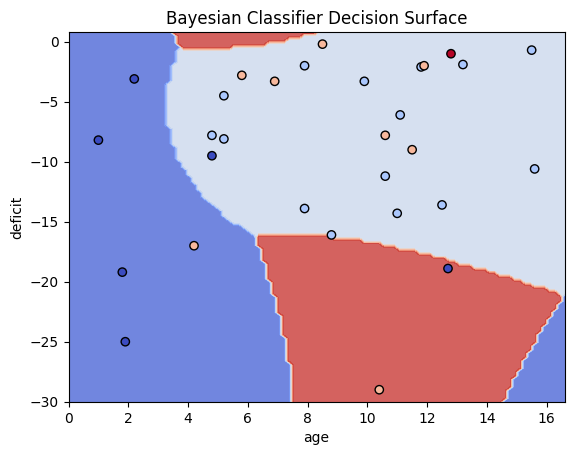

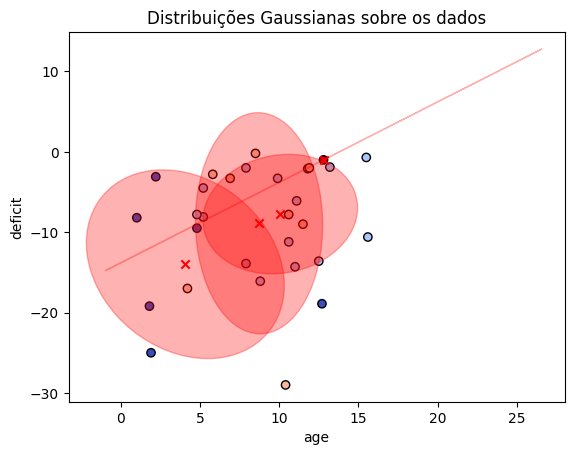

Matriz de Confusão (Exibição direta):
[[1 1 0 0]
 [0 3 0 0]
 [0 7 0 0]
 [0 1 0 0]]


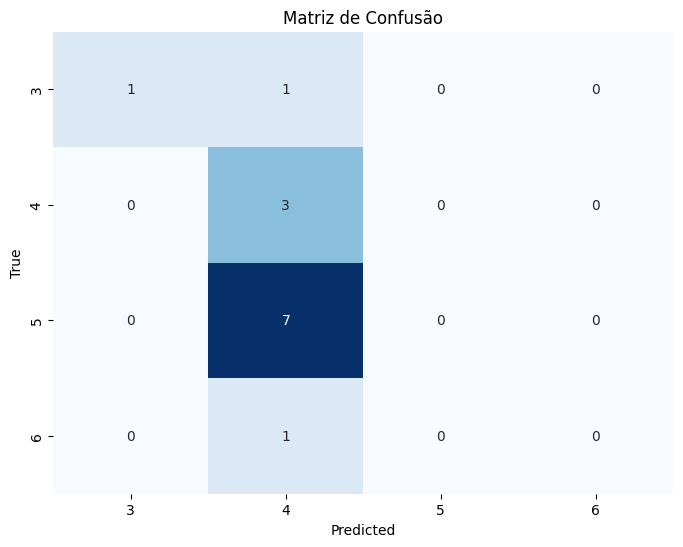

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import multivariate_normal
import seaborn as sns
from matplotlib.patches import Ellipse

# Função para o classificador bayesiano gaussiano multivariado
class MultivariateGaussianBayesianClassifier:
    def __init__(self):
        self.classes_ = None
        self.means_ = None
        self.covariances_ = None
        self.priors_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means_ = np.zeros((len(self.classes_), X.shape[1]))
        self.covariances_ = np.zeros((len(self.classes_), X.shape[1], X.shape[1]))
        self.priors_ = np.zeros(len(self.classes_))

        for i, cls in enumerate(self.classes_):
            X_cls = X[y == cls]
            self.means_[i] = np.mean(X_cls, axis=0)
            self.covariances_[i] = np.cov(X_cls, rowvar=False)
            self.priors_[i] = X_cls.shape[0] / float(X.shape[0])

    def predict(self, X):
        posteriors = []
        for i in range(len(self.classes_)):
            mean = self.means_[i]
            cov = self.covariances_[i]
            prior = self.priors_[i]
            # Calculando a verossimilhança e a posteriori
            likelihood = multivariate_normal.pdf(X, mean=mean, cov=cov, allow_singular=True)
            posterior = likelihood * prior
            posteriors.append(posterior)
        posteriors = np.array(posteriors).T
        return self.classes_[np.argmax(posteriors, axis=1)]

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, classifier, feature_names, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

# Função para plotar as distribuições gaussianas
def plot_gaussians(X, y, means, covariances, feature_names):
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    for mean, cov in zip(means, covariances):
        plt.scatter(mean[0], mean[1], c='red', marker='x')
        # Desenhando elipses que representam as distribuições gaussianas
        v, w = np.linalg.eigh(cov)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = np.degrees(angle)
        ell = Ellipse(xy=mean, width=v[0], height=v[1], angle=angle, color='red', alpha=0.3)
        plt.gca().add_patch(ell)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Distribuições Gaussianas sobre os dados")
    plt.show()

# Função para plotar a matriz de confusão usando matplotlib
def plot_confusion_matrix(conf_matrix, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Matriz de Confusão")
    plt.show()

# Carregar o dataset da Coluna Vertebral
vertebral_column = fetch_openml(data_id=212, as_frame=True)
X = vertebral_column.data.values
y = vertebral_column.target.values.astype(int)

# Realizar a divisão de dados em treino e teste
accuracy_list = []
chosen_features = [0, 1]  # Exemplo de escolha de atributos
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Implementação do classificador bayesiano gaussiano multivariado
    bayesian_classifier = MultivariateGaussianBayesianClassifier()
    
    # Ajustando o modelo para treinar apenas com as características escolhidas
    bayesian_classifier.fit(X_train[:, chosen_features], y_train)
    y_pred = bayesian_classifier.predict(X_test[:, chosen_features])
    
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Exibir os resultados de acurácia
accuracy_mean = np.mean(accuracy_list)
accuracy_std = np.std(accuracy_list)
print(f'Acurácia média: {accuracy_mean:.2f} ± {accuracy_std:.2f}')

# Plotar a superfície de decisão usando as características escolhidas
plot_decision_surface(X_train[:, chosen_features], y_train, bayesian_classifier, 
                      feature_names=[vertebral_column.feature_names[i] for i in chosen_features],
                      title="Bayesian Classifier Decision Surface")

# Plotar as distribuições gaussianas sobre os dados de treinamento
plot_gaussians(X_train[:, chosen_features], y_train, bayesian_classifier.means_, 
               bayesian_classifier.covariances_, feature_names=[vertebral_column.feature_names[i] for i in chosen_features])

# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão (Exibição direta):")
print(conf_matrix)

# Plotar a matriz de confusão usando matplotlib
plot_confusion_matrix(conf_matrix, classes=np.unique(y))


In [17]:
from collections import Counter

# Verificar a distribuição das classes no dataset
print("Distribuição das classes no conjunto total:")
print(Counter(y))

# Verificar a distribuição das classes no conjunto de treinamento
print("Distribuição das classes no conjunto de treinamento:")
print(Counter(y_train))

# Verificar a distribuição das classes no conjunto de teste
print("Distribuição das classes no conjunto de teste:")
print(Counter(y_test))


Distribuição das classes no conjunto total:
Counter({np.int64(4): 18, np.int64(5): 15, np.int64(3): 8, np.int64(6): 2})
Distribuição das classes no conjunto de treinamento:
Counter({np.int64(4): 15, np.int64(5): 8, np.int64(3): 6, np.int64(6): 1})
Distribuição das classes no conjunto de teste:
Counter({np.int64(5): 7, np.int64(4): 3, np.int64(3): 2, np.int64(6): 1})


Classificador Bayesiano Gaussiano Multivariado: Implementa o cálculo das probabilidades a posteriori com base nas densidades gaussianas multivariadas específicas para cada classe.

Matriz de Confusão: Calculada para uma das execuções e plotada utilizando o seaborn para visualização gráfica.

Superfície de Decisão: Gerada utilizando dois atributos (sepal length e sepal width), mostrando a separação das classes com base nas probabilidades gaussianas.

Contornos das Gaussianas: Visualização dos contornos das distribuições gaussianas estimadas sobre os dados para cada classe, mostrando como as classes se distribuem no espaço dos atributos selecionados.

Execução 1: Acurácia = 0.80


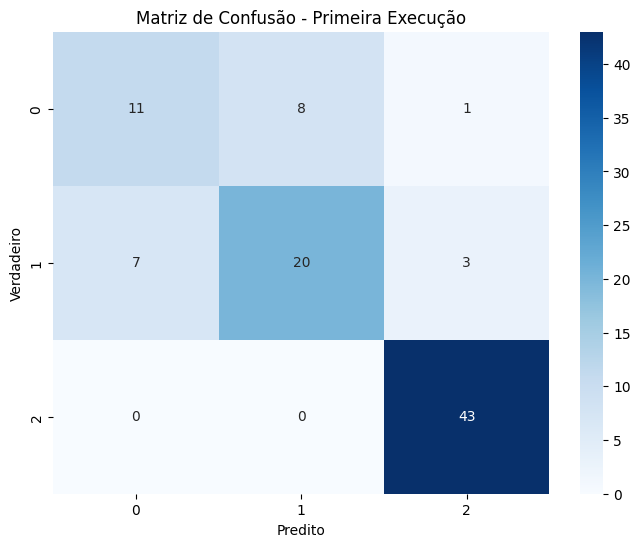

Matriz de Confusão - Primeira Execução:
[[11  8  1]
 [ 7 20  3]
 [ 0  0 43]]
Execução 2: Acurácia = 0.84
Execução 3: Acurácia = 0.83
Execução 4: Acurácia = 0.84
Execução 5: Acurácia = 0.80
Execução 6: Acurácia = 0.80
Execução 7: Acurácia = 0.82
Execução 8: Acurácia = 0.82
Execução 9: Acurácia = 0.84
Execução 10: Acurácia = 0.87
Execução 11: Acurácia = 0.87
Execução 12: Acurácia = 0.82
Execução 13: Acurácia = 0.81
Execução 14: Acurácia = 0.83
Execução 15: Acurácia = 0.78
Execução 16: Acurácia = 0.82
Execução 17: Acurácia = 0.80
Execução 18: Acurácia = 0.80
Execução 19: Acurácia = 0.80
Execução 20: Acurácia = 0.80


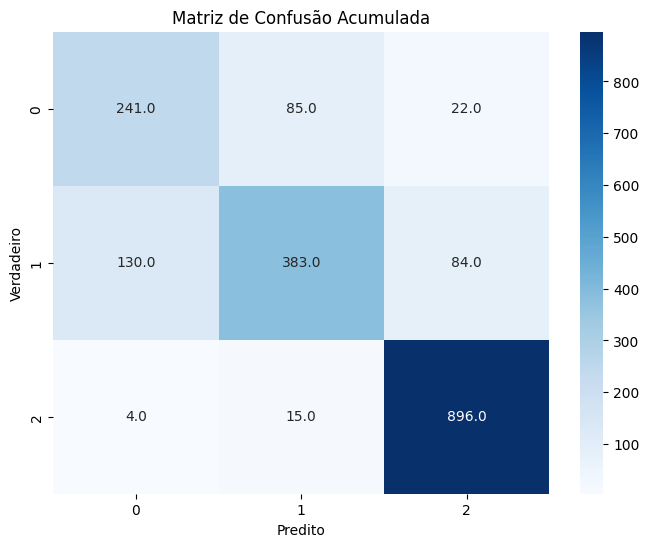

Matriz de Confusão Acumulada:
[[241.  85.  22.]
 [130. 383.  84.]
 [  4.  15. 896.]]


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Fetch dataset
vertebral_column = fetch_ucirepo(id=212)

# Data (as pandas dataframes)
x_vertebral = vertebral_column.data.features
y_vertebral = vertebral_column.data.targets

# Convertendo para DataFrame
df_vertebral = pd.DataFrame(x_vertebral, columns=vertebral_column.feature_names)
df_vertebral['label'] = y_vertebral

# Codificando a variável alvo
le = LabelEncoder()
df_vertebral['label'] = le.fit_transform(df_vertebral['label'])

# Função para treinar o modelo e calcular a matriz de confusão
def compute_confusion_matrix(nb_runs=20):
    conf_matrix_total = np.zeros((3, 3))
    
    for i in range(nb_runs):
        X_train, X_test, y_train, y_test = train_test_split(df_vertebral.iloc[:, :-1], 
                                                            df_vertebral['label'], test_size=0.3, random_state=i)
        
        # Modelo Naive Bayes Gaussiano
        model = GaussianNB()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Matriz de confusão
        conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrix_total += conf_matrix
        
        # Acurácia para cada execução
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Execução {i+1}: Acurácia = {accuracy:.2f}")
        
        if i == 0:  # Apenas para a primeira execução
            plt.figure(figsize=(8, 6))
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
            plt.title("Matriz de Confusão - Primeira Execução")
            plt.xlabel("Predito")
            plt.ylabel("Verdadeiro")
            plt.show()
            
            print("Matriz de Confusão - Primeira Execução:")
            print(conf_matrix)
    
    # Matriz de confusão total acumulada
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_total, annot=True, fmt='.1f', cmap='Blues')
    plt.title("Matriz de Confusão Acumulada")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.show()
    
    print("Matriz de Confusão Acumulada:")
    print(conf_matrix_total)

# Executar a função
compute_confusion_matrix()


Vou escolher os atributos pelvic_incidence e pelvic_tilt porque ambos se referem à inclinação da pelve e estão diretamente relacionados com a coluna vertebral, o que pode ter uma forte correlação com as classes "Hernia", "Spondylolisthesis" e "Normal".

Execução 1: Acurácia = 0.62


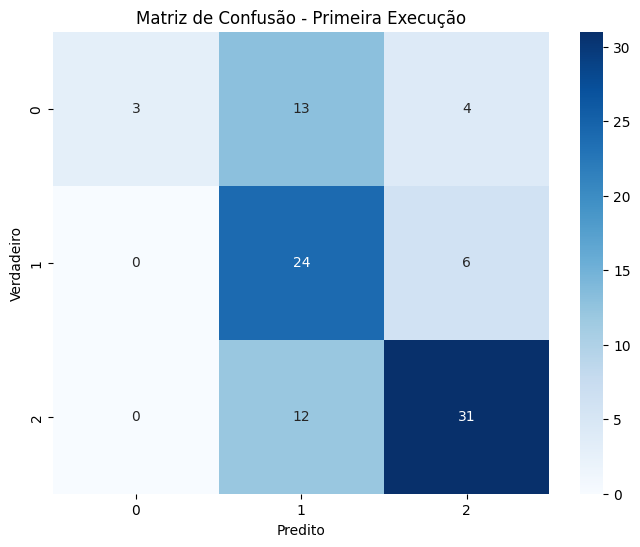

Matriz de Confusão - Primeira Execução:
[[ 3 13  4]
 [ 0 24  6]
 [ 0 12 31]]


C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


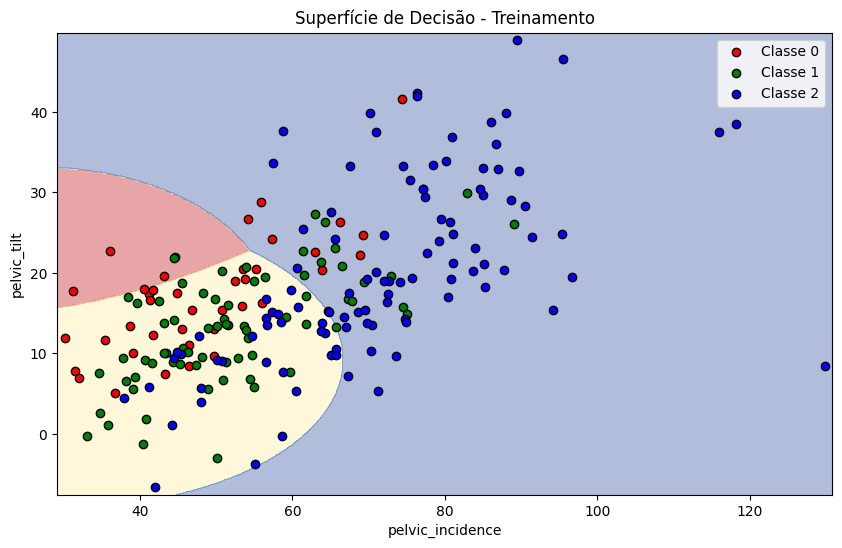

C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


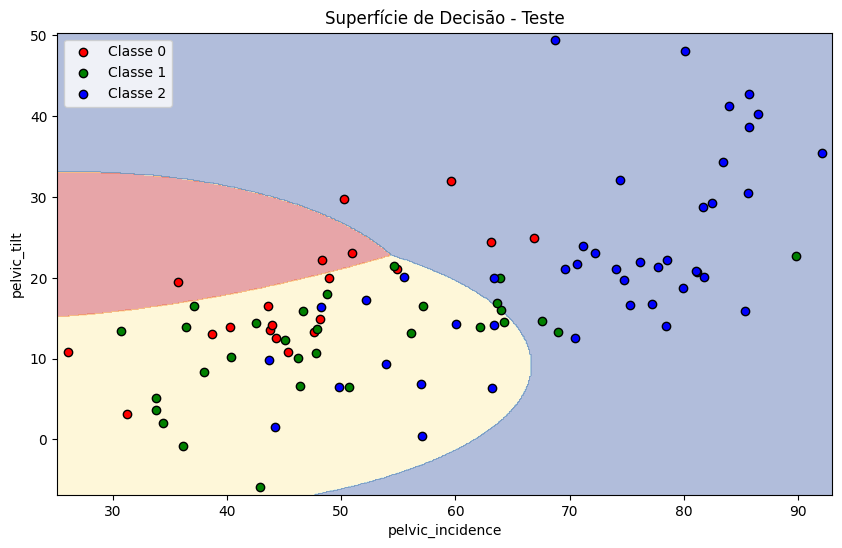

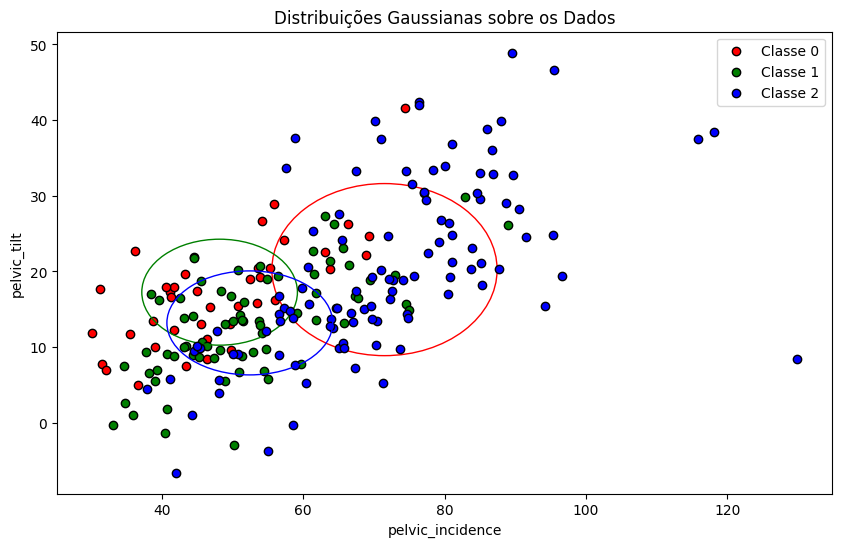

Execução 2: Acurácia = 0.60
Execução 3: Acurácia = 0.55
Execução 4: Acurácia = 0.65
Execução 5: Acurácia = 0.65
Execução 6: Acurácia = 0.65
Execução 7: Acurácia = 0.62
Execução 8: Acurácia = 0.67
Execução 9: Acurácia = 0.62
Execução 10: Acurácia = 0.62
Execução 11: Acurácia = 0.60
Execução 12: Acurácia = 0.59
Execução 13: Acurácia = 0.57
Execução 14: Acurácia = 0.68
Execução 15: Acurácia = 0.66
Execução 16: Acurácia = 0.63
Execução 17: Acurácia = 0.61
Execução 18: Acurácia = 0.63
Execução 19: Acurácia = 0.57
Execução 20: Acurácia = 0.65


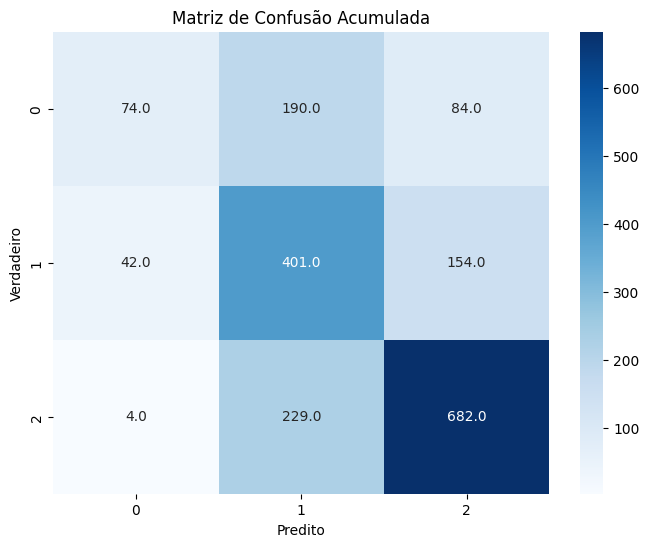

Matriz de Confusão Acumulada:
[[ 74. 190.  84.]
 [ 42. 401. 154.]
 [  4. 229. 682.]]


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.patches import Ellipse

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, model, feature_names, title="Superfície de Decisão"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    
    # Plotar os pontos de dados reais
    for label, color in zip(np.unique(y), ['r', 'g', 'b']):
        subset = X[y == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f"Classe {label}", c=color, edgecolor='k')
    
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# Função para plotar as gaussianas sobre os dados
def plot_gaussians(X, y, model, feature_names):
    plt.figure(figsize=(10, 6))
    
    for label, color in zip(np.unique(y), ['r', 'g', 'b']):
        subset = X[y == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f"Classe {label}", c=color, edgecolor='k')

        # Adicionar elipses representando as gaussianas
        mean = model.theta_[label - 1]  # Obter a média da classe
        variances = model.var_[label - 1]  # Obter as variâncias por classe
        
        # As variâncias são usadas como os comprimentos dos eixos da elipse
        width, height = 2 * np.sqrt(variances)  # 1 desvio padrão
        ellipse = Ellipse(mean, width, height, angle=0, edgecolor=color, facecolor='none')
        plt.gca().add_patch(ellipse)
    
    plt.title("Distribuições Gaussianas sobre os Dados")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# Função principal para executar o código
def compute_confusion_matrix(nb_runs=20):
    conf_matrix_total = np.zeros((3, 3))
    
    selected_features = ['pelvic_incidence', 'pelvic_tilt']  # Atributos selecionados

    for i in range(nb_runs):
        # Divisão dos dados em treinamento e teste
        X_train, X_test, y_train, y_test = train_test_split(df_vertebral[selected_features], 
                                                            df_vertebral['label'], test_size=0.3, random_state=i)
        
        # Modelo Naive Bayes Gaussiano treinado com os atributos selecionados
        model = GaussianNB()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Matriz de confusão
        conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrix_total += conf_matrix
        
        # Acurácia para cada execução
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Execução {i+1}: Acurácia = {accuracy:.2f}")
        
        if i == 0:  # Apenas para a primeira execução
            plt.figure(figsize=(8, 6))
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
            plt.title("Matriz de Confusão - Primeira Execução")
            plt.xlabel("Predito")
            plt.ylabel("Verdadeiro")
            plt.show()
            
            print("Matriz de Confusão - Primeira Execução:")
            print(conf_matrix)
            
            # Plotar a superfície de decisão usando os dados de treinamento
            plot_decision_surface(X_train.values, y_train, model, selected_features, title="Superfície de Decisão - Treinamento")
            
            # Plotar a superfície de decisão usando os dados de teste
            plot_decision_surface(X_test.values, y_test, model, selected_features, title="Superfície de Decisão - Teste")
            
            # Plotar as distribuições gaussianas sobre os dados de treinamento
            plot_gaussians(X_train.values, y_train, model, selected_features)
    
    # Matriz de confusão total acumulada
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_total, annot=True, fmt='.1f', cmap='Blues')
    plt.title("Matriz de Confusão Acumulada")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.show()
    
    print("Matriz de Confusão Acumulada:")
    print(conf_matrix_total)

# Executar a função
compute_confusion_matrix()


<h2>Classificando Dataset o Cancer de Mama</h2>

Acurácia média: 0.43 ± 0.04


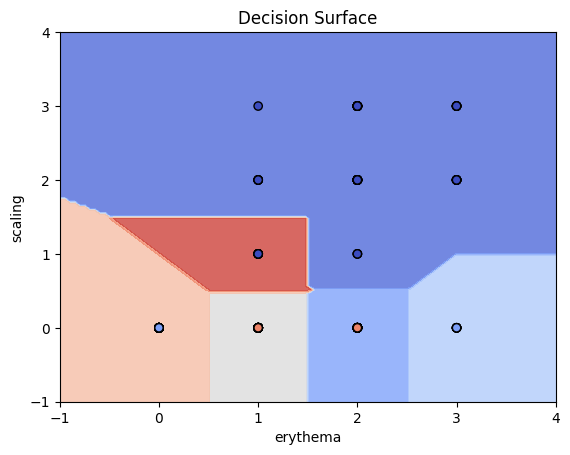

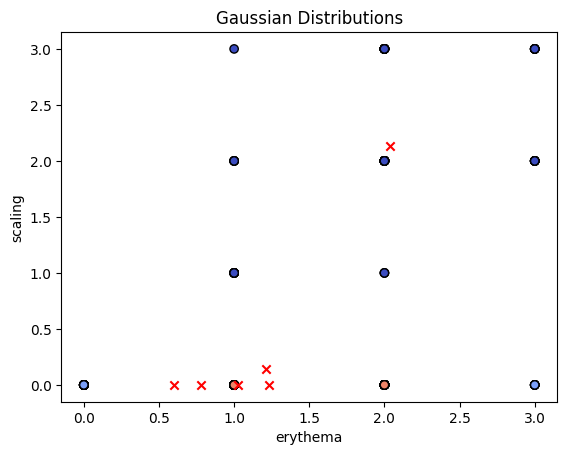

Matriz de Confusão (Exibição direta):
[[31  0  0  0  0  4]
 [ 0  4  1  6  7  0]
 [ 0  5  1  9  5  0]
 [ 0  2  0  7  7  0]
 [ 0  3  0  6  4  0]
 [ 0  3  0  2  1  0]]


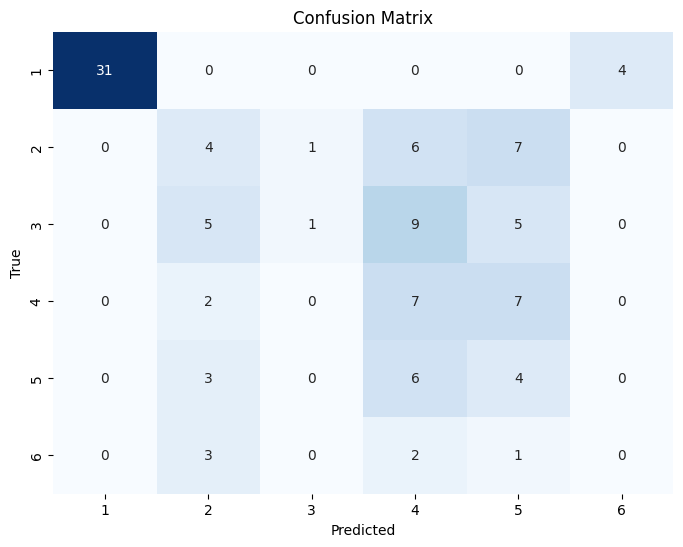

In [20]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KernelDensity
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Função para calcular a probabilidade densidade com Janela de Parzen
class BayesianParzenClassifier:
    def __init__(self, bandwidth=0.1):
        self.bandwidth = bandwidth
        self.classes_ = None
        self.kde_models = {}
    
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.kde_models = {}
        self.means = []
        self.covariances = []
        for cls in self.classes_:
            kde = KernelDensity(bandwidth=self.bandwidth)
            kde.fit(X[y == cls])
            self.kde_models[cls] = kde

            # Armazenando a média e covariância para plotar as gaussianas
            self.means.append(np.mean(X[y == cls], axis=0))
            self.covariances.append(np.cov(X[y == cls], rowvar=False))
    
    def predict(self, X):
        log_probs = np.array([self.kde_models[cls].score_samples(X) for cls in self.classes_]).T
        return self.classes_[np.argmax(log_probs, axis=1)]

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, classifier, feature_names, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

# Função para plotar as distribuições gaussianas
def plot_gaussians(X, y, means, covariances, feature_names):
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    for mean, cov in zip(means, covariances):
        plt.scatter(mean[0], mean[1], c='red', marker='x')
        # Aqui você pode desenhar elipses que representem as distribuições gaussianas (opcional)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Gaussian Distributions")
    plt.show()

# Função para plotar a matriz de confusão usando matplotlib
def plot_confusion_matrix(conf_matrix, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# Carregar o dataset de câncer de pele
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data'
column_names = ['erythema', 'scaling', 'definite-borders', 'itching', 'koebner', 'polygonal-papules', 
                'follicular-papules', 'oral-mucosal', 'knee-elbow', 'scalp', 'family-history', 
                'melanin', 'eosinophils', 'PNL', 'fibrosis', 'age', 'label']
data = pd.read_csv(url, header=None, names=column_names, na_values='?')

# Preprocessar dados
data.dropna(inplace=True)
X = data.drop('label', axis=1)
y = data['label']

# Codificar o alvo se for categórico
le = LabelEncoder()
y = le.fit_transform(y)

# Selecionar dois atributos para visualização e simplificação
chosen_features = [0, 1]  # Exemplo: usar 'erythema' e 'scaling'

# Realizar a divisão de dados em treino e teste
accuracy_list = []
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, chosen_features], y, test_size=0.3, random_state=None)

    # Implementação do classificador bayesiano com Janela de Parzen
    bayesian_classifier = BayesianParzenClassifier(bandwidth=0.1)
    
    # Ajustando o modelo para treinar apenas com as características escolhidas
    bayesian_classifier.fit(X_train.values, y_train)
    y_pred = bayesian_classifier.predict(X_test.values)
    
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Exibir os resultados de acurácia
accuracy_mean = np.mean(accuracy_list)
accuracy_std = np.std(accuracy_list)
print(f'Acurácia média: {accuracy_mean:.2f} ± {accuracy_std:.2f}')

# Plotar a superfície de decisão usando as características escolhidas
plot_decision_surface(X_train.values, y_train, bayesian_classifier, 
                      feature_names=[column_names[i] for i in chosen_features],
                      title="Decision Surface")

# Plotar as distribuições gaussianas sobre os dados de treinamento
plot_gaussians(X_train.values, y_train, bayesian_classifier.means, 
               bayesian_classifier.covariances, feature_names=[column_names[i] for i in chosen_features])

# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão (Exibição direta):")
print(conf_matrix)

# Plotar a matriz de confusão usando matplotlib
plot_confusion_matrix(conf_matrix, classes=le.classes_)


Acurácia média: 0.49 ± 0.04


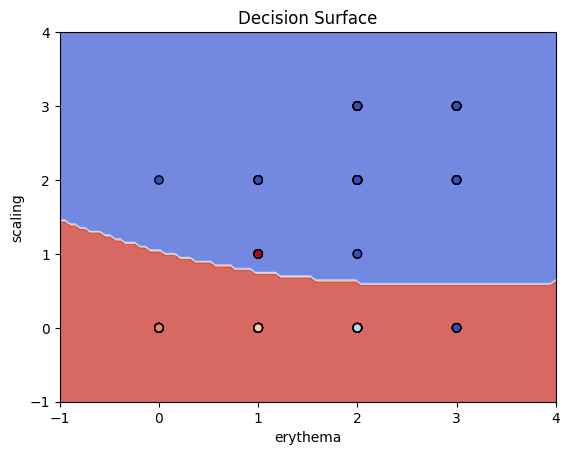

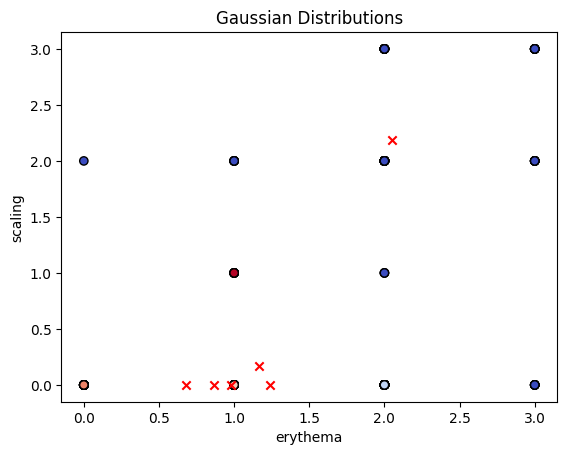

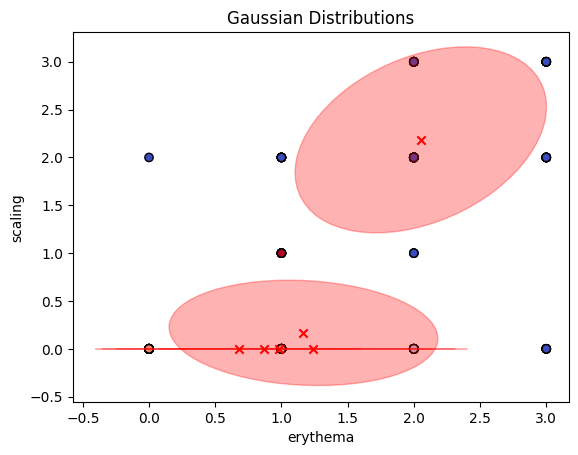

Matriz de Confusão (Exibição direta):
[[33  0  2  0  0  0]
 [ 0  5  8  0  0  0]
 [ 0  5 12  0  0  0]
 [ 0  4 13  0  0  0]
 [ 0 13  5  0  0  0]
 [ 0  0  8  0  0  0]]


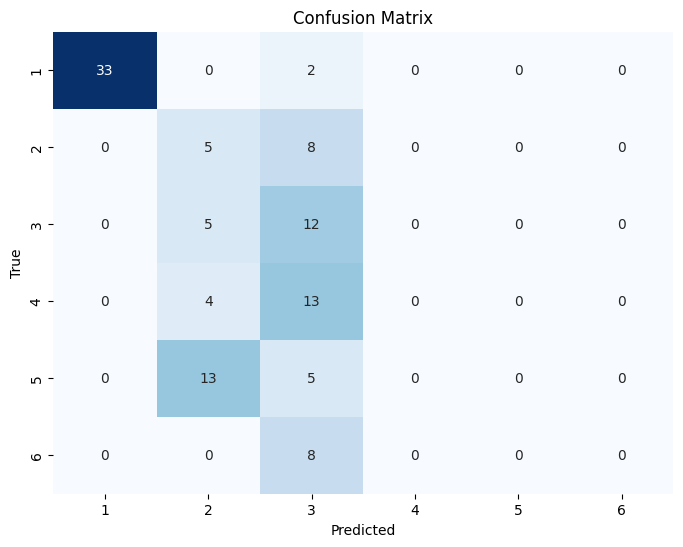

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Função para calcular a probabilidade densidade com o Classificador Bayesiano Multivariado
class BayesianMultivariateGaussianClassifier:
    def __init__(self, regularization=1e-6):
        self.classes_ = None
        self.means = []
        self.covariances = []
        self.priors = []
        self.regularization = regularization  # Regularização adicionada

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means = []
        self.covariances = []
        self.priors = []
        for cls in self.classes_:
            X_class = X[y == cls]
            self.means.append(np.mean(X_class, axis=0))
            # Adicionando regularização na matriz de covariância
            cov = np.cov(X_class, rowvar=False) + self.regularization * np.eye(X_class.shape[1])
            self.covariances.append(cov)
            self.priors.append(len(X_class) / len(X))

    def predict(self, X):
        probabilities = []
        for cls in range(len(self.classes_)):
            mean = self.means[cls]
            cov = self.covariances[cls]
            prior = self.priors[cls]

            # Calcular o log da função densidade de probabilidade multivariada
            cov_inv = np.linalg.inv(cov)
            diff = X - mean
            exponent = -0.5 * np.einsum('ij,jk,ik->i', diff, cov_inv, diff)
            log_prob = np.log(prior) + exponent - 0.5 * np.log(np.linalg.det(cov))
            probabilities.append(log_prob)

        probabilities = np.array(probabilities).T
        return self.classes_[np.argmax(probabilities, axis=1)]

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, classifier, feature_names, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

# Função para plotar as distribuições gaussianas
def plot_gaussians(X, y, means, covariances, feature_names):
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    for mean, cov in zip(means, covariances):
        plt.scatter(mean[0], mean[1], c='red', marker='x')
        # Aqui você pode desenhar elipses que representem as distribuições gaussianas (opcional)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Gaussian Distributions")
    plt.show()

# Função para plotar a matriz de confusão usando matplotlib
def plot_confusion_matrix(conf_matrix, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# Carregar o dataset de câncer de pele
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data'
column_names = ['erythema', 'scaling', 'definite-borders', 'itching', 'koebner', 'polygonal-papules', 
                'follicular-papules', 'oral-mucosal', 'knee-elbow', 'scalp', 'family-history', 
                'melanin', 'eosinophils', 'PNL', 'fibrosis', 'age', 'label']
data = pd.read_csv(url, header=None, names=column_names, na_values='?')

# Preprocessar dados
data.dropna(inplace=True)
X = data.drop('label', axis=1)
y = data['label']

# Codificar o alvo se for categórico
le = LabelEncoder()
y = le.fit_transform(y)

# Selecionar dois atributos para visualização e simplificação
chosen_features = [0, 1]  # Exemplo: usar 'erythema' e 'scaling'

# Realizar a divisão de dados em treino e teste
accuracy_list = []
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, chosen_features], y, test_size=0.3, random_state=None)

    # Implementação do classificador bayesiano multivariado
    bayesian_classifier = BayesianMultivariateGaussianClassifier()
    
    # Ajustando o modelo para treinar apenas com as características escolhidas
    bayesian_classifier.fit(X_train.values, y_train)
    y_pred = bayesian_classifier.predict(X_test.values)

    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Exibir os resultados de acurácia
accuracy_mean = np.mean(accuracy_list)
accuracy_std = np.std(accuracy_list)
print(f'Acurácia média: {accuracy_mean:.2f} ± {accuracy_std:.2f}')

# Plotar a superfície de decisão usando as características escolhidas
plot_decision_surface(X_train.values, y_train, bayesian_classifier, 
                      feature_names=[column_names[i] for i in chosen_features],
                      title="Decision Surface")

# Plotar as distribuições gaussianas sobre os dados de treinamento
plot_gaussians(X_train.values, y_train, bayesian_classifier.means, 
               bayesian_classifier.covariances, feature_names=[column_names[i] for i in chosen_features])
def plot_gaussians2(X, y, means, covariances, feature_names):
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    for mean, cov in zip(means, covariances):
        plt.scatter(mean[0], mean[1], c='red', marker='x')
        # Desenhando elipses que representam as distribuições gaussianas
        v, w = np.linalg.eigh(cov)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = np.degrees(angle)
        ell = Ellipse(xy=mean, width=v[0], height=v[1], angle=angle, color='red', alpha=0.3)
        plt.gca().add_patch(ell)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Gaussian Distributions")
    plt.show()

plot_gaussians2(X_train.values, y_train, bayesian_classifier.means, 
               bayesian_classifier.covariances, feature_names=[column_names[i] for i in chosen_features])
# Calcular e exibir a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão (Exibição direta):")
print(conf_matrix)

# Plotar a matriz de confusão usando matplotlib
plot_confusion_matrix(conf_matrix, classes=le.classes_)


<h2>Dataset Dermatologico</h2>

C:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Execução 1: Acurácia = 0.20


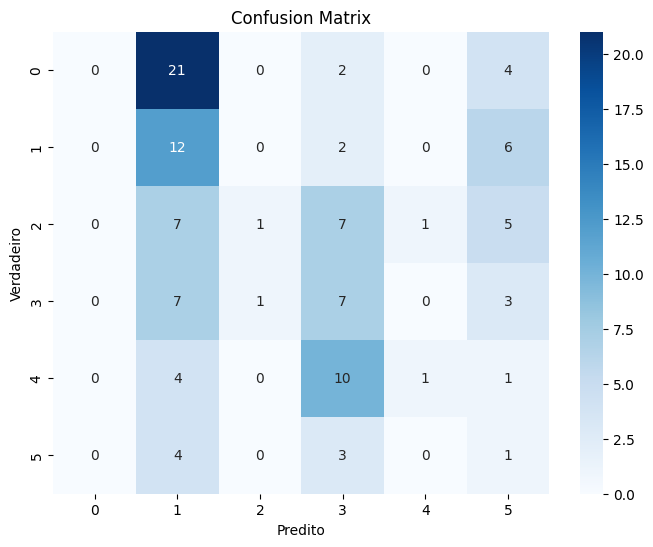

Confusion Matrix
[[ 0 21  0  2  0  4]
 [ 0 12  0  2  0  6]
 [ 0  7  1  7  1  5]
 [ 0  7  1  7  0  3]
 [ 0  4  0 10  1  1]
 [ 0  4  0  3  0  1]]


C:\Users\jorge\AppData\Local\Temp\ipykernel_23924\1794312001.py:45: RuntimeWarning: overflow encountered in exp
  probabilities[:, cls] = priors[cls] * np.exp(exponent) / np.sqrt(np.linalg.det(covariances[cls]))


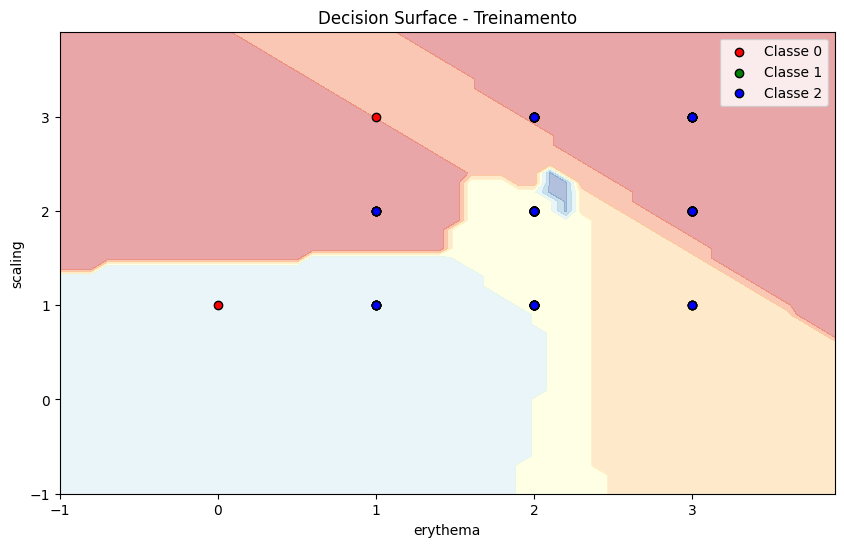

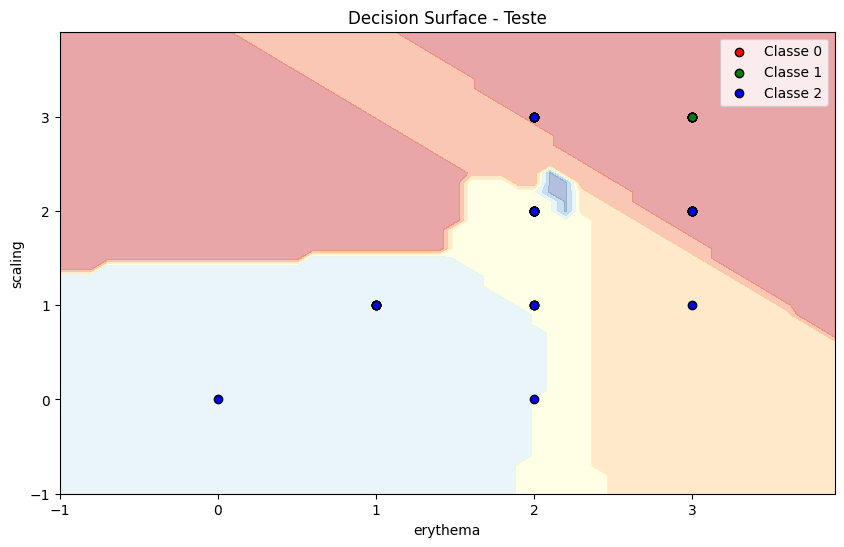

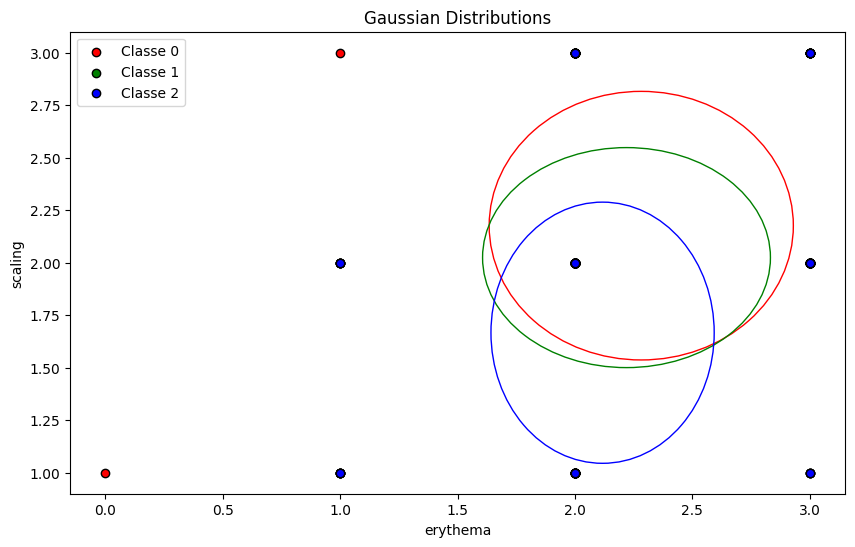

Execução 2: Acurácia = 0.26
Execução 3: Acurácia = 0.34
Execução 4: Acurácia = 0.25
Execução 5: Acurácia = 0.36
Execução 6: Acurácia = 0.22
Execução 7: Acurácia = 0.30
Execução 8: Acurácia = 0.21
Execução 9: Acurácia = 0.33
Execução 10: Acurácia = 0.33
Execução 11: Acurácia = 0.18
Execução 12: Acurácia = 0.26
Execução 13: Acurácia = 0.19
Execução 14: Acurácia = 0.26
Execução 15: Acurácia = 0.19
Execução 16: Acurácia = 0.17
Execução 17: Acurácia = 0.24
Execução 18: Acurácia = 0.12
Execução 19: Acurácia = 0.16
Execução 20: Acurácia = 0.29


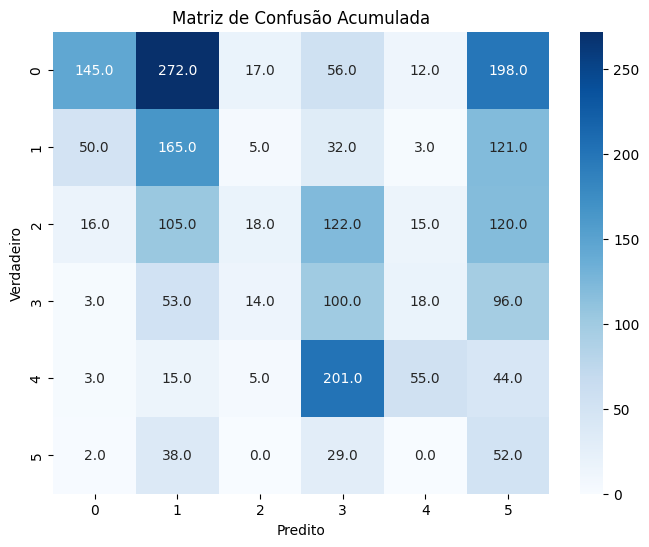

Matriz de Confusão Acumulada:
[[145. 272.  17.  56.  12. 198.]
 [ 50. 165.   5.  32.   3. 121.]
 [ 16. 105.  18. 122.  15. 120.]
 [  3.  53.  14. 100.  18.  96.]
 [  3.  15.   5. 201.  55.  44.]
 [  2.  38.   0.  29.   0.  52.]]


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.patches import Ellipse
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

# Fetch dataset
dermatology = fetch_ucirepo(id=33)

# Data (as pandas dataframes)
X = dermatology.data.features
y = dermatology.data.targets

# Encode labels if they are categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Função para calcular média e covariância para cada classe
def calculate_parameters(X, y):
    classes = np.unique(y)
    means = []
    covariances = []
    
    for cls in classes:
        X_cls = X[y == cls]
        means.append(X_cls.mean(axis=0))
        covariances.append(np.cov(X_cls, rowvar=False))
    
    return np.array(means), np.array(covariances)

# Função para calcular a probabilidade a posteriori
def predict(X, means, covariances, priors):
    n_samples = X.shape[0]
    n_classes = means.shape[0]
    probabilities = np.zeros((n_samples, n_classes))

    for cls in range(n_classes):
        cov_inv = np.linalg.inv(covariances[cls])
        diff = X - means[cls]
        exponent = -0.5 * np.einsum('ij,jk->i', diff, np.dot(cov_inv, diff.T))
        probabilities[:, cls] = priors[cls] * np.exp(exponent) / np.sqrt(np.linalg.det(covariances[cls]))
    
    return np.argmax(probabilities, axis=1)

# Função para plotar a superfície de decisão
def plot_decision_surface(X, y, means, covariances, priors, feature_names, title="Superfície de Decisão"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = predict(np.c_[xx.ravel(), yy.ravel()], means, covariances, priors)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    
    # Plotar os pontos de dados reais
    for label, color in zip(np.unique(y), ['r', 'g', 'b']):
        subset = X[y == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f"Classe {label}", c=color, edgecolor='k')
    
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# Função para plotar as gaussianas sobre os dados
def plot_gaussians(X, y, means, covariances, feature_names):
    plt.figure(figsize=(10, 6))
    
    for label, color in zip(np.unique(y), ['r', 'g', 'b']):
        subset = X[y == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f"Classe {label}", c=color, edgecolor='k')

        # Adicionar elipses representando as gaussianas
        mean = means[label]  # Obter a média da classe
        covariance = covariances[label]  # Obter a matriz de covariância da classe
        
        # As variâncias são usadas como os comprimentos dos eixos da elipse
        width, height = 2 * np.sqrt(np.diag(covariance))  # 1 desvio padrão
        ellipse = Ellipse(mean, width, height, angle=0, edgecolor=color, facecolor='none')
        plt.gca().add_patch(ellipse)
    
    plt.title("Gaussian Distributions")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# Função principal para executar o código
def compute_confusion_matrix(nb_runs=20):
    conf_matrix_total = None  # Inicializa como None para permitir que seja definida dinamicamente
    selected_features = ['erythema', 'scaling']  # Atributos selecionados

    for i in range(nb_runs):
        # Divisão dos dados em treinamento e teste
        X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y_encoded, test_size=0.3, random_state=i)
        
        # Cálculo de médias, covariâncias e priors
        means, covariances = calculate_parameters(X_train.values, y_train)
        priors = np.array([np.mean(y_train == cls) for cls in np.unique(y_train)])

        # Previsão
        y_pred = predict(X_test.values, means, covariances, priors)
        
        # Matriz de confusão
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Inicializa a matriz de confusão total na primeira execução
        if conf_matrix_total is None:
            conf_matrix_total = np.zeros(conf_matrix.shape)
        
        conf_matrix_total += conf_matrix
        
        # Acurácia para cada execução
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Execução {i+1}: Acurácia = {accuracy:.2f}")
        
        if i == 0:  # Apenas para a primeira execução
            plt.figure(figsize=(8, 6))
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
            plt.title("Confusion Matrix")
            plt.xlabel("Predito")
            plt.ylabel("Verdadeiro")
            plt.show()
            
            print("Confusion Matrix")
            print(conf_matrix)
            
            # Plotar a superfície de decisão
            plot_decision_surface(X_train.values, y_train, means, covariances, priors, selected_features, title="Decision Surface - Treinamento")
            plot_decision_surface(X_test.values, y_test, means, covariances, priors, selected_features, title="Decision Surface - Teste")
            
            # Plotar as distribuições gaussianas sobre os dados de treinamento
            plot_gaussians(X_train.values, y_train, means, covariances, selected_features)
    
    # Matriz de confusão total acumulada
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_total, annot=True, fmt='.1f', cmap='Blues')
    plt.title("Matriz de Confusão Acumulada")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.show()
    
    print("Matriz de Confusão Acumulada:")
    print(conf_matrix_total)

# Executar a função
compute_confusion_matrix()
